In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

def check_values(df, columns):
    for col in columns:
        print(f"unique value : {df[col].unique()}")
        print(f"Value count : {df[col].value_counts()}")
        print(f"Total unique number : {df[col].nunique()}")
        print(f"Total null value: {df[col].isnull().sum()}")
        print(f"Null data : {df[df[col].isnull()]}")

In [4]:
df = pd.read_csv("loan_approval_dataset.csv")
#remove whitespace on column names
df.columns = df.columns.str.strip().str.lower()

categorical_col = df.select_dtypes(include=object).columns
df[categorical_col] = df[categorical_col].apply(lambda x: x.str.strip())

print(df.info())
print(df.shape)
print(f"Null value : {df.isnull().sum()}")
print(f"Duplicated value : {df.duplicated().sum()}")
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None
(4269, 13)
Null value : l

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [5]:
# is the dataset balanced or imbalanced?
df['loan_status'].value_counts(normalize=True)

loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64

/var/folders/w5/nyp7f5y53w53xb69z47g2g3h0000gn/T/ipykernel_2478/1412525992.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


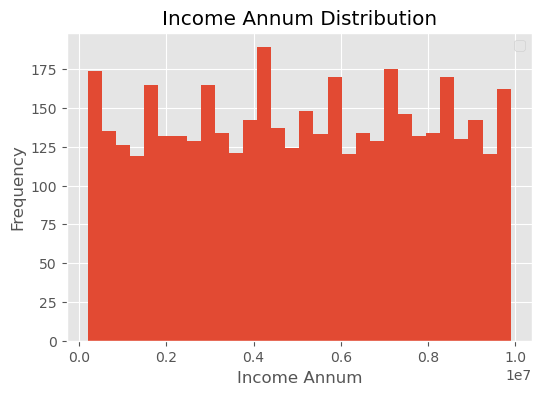

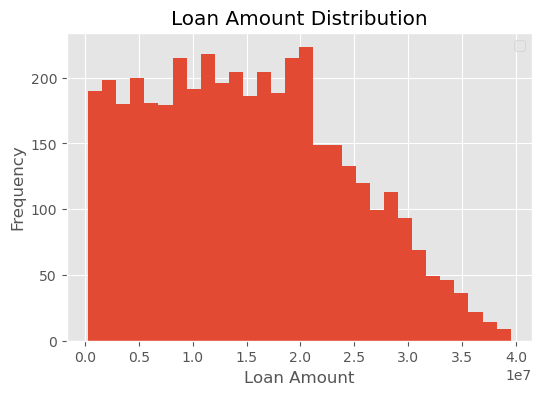

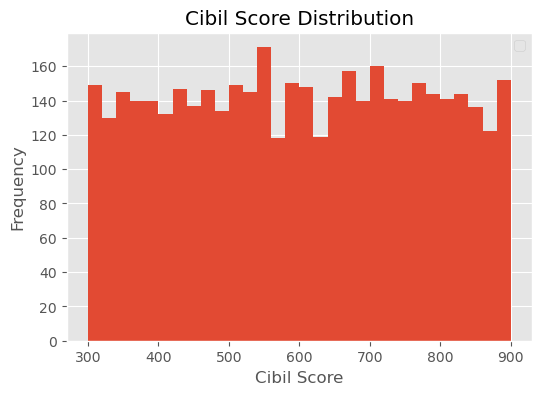

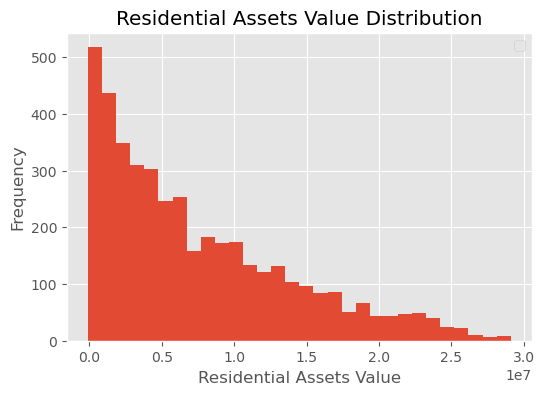

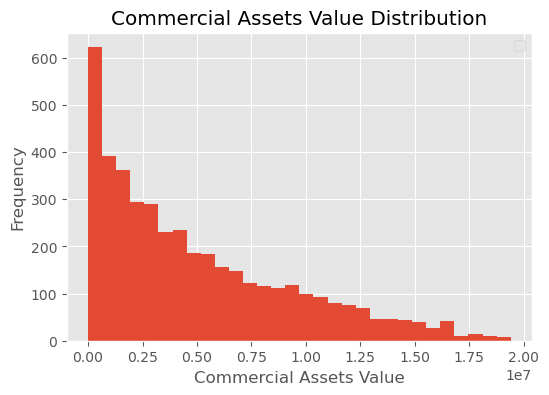

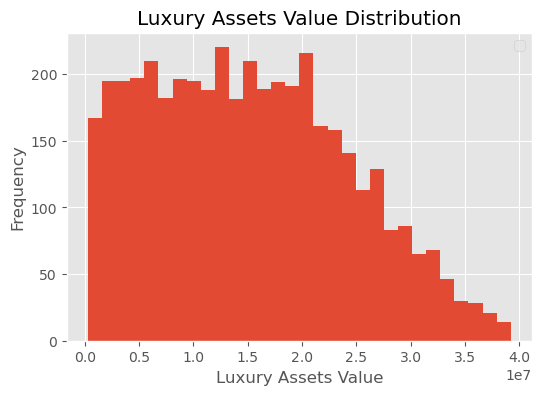

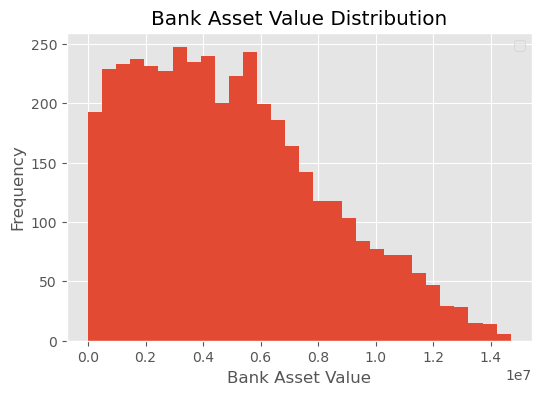

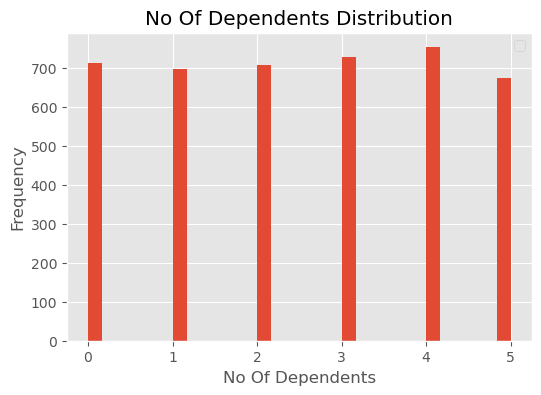

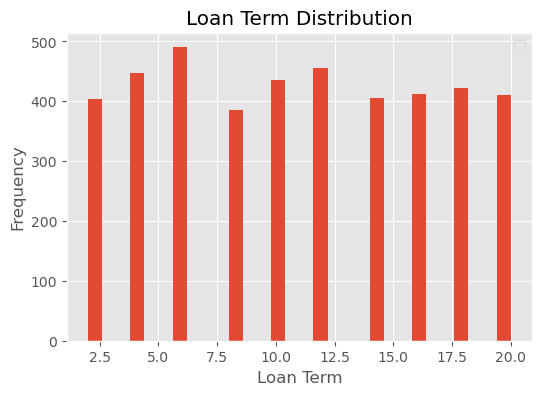

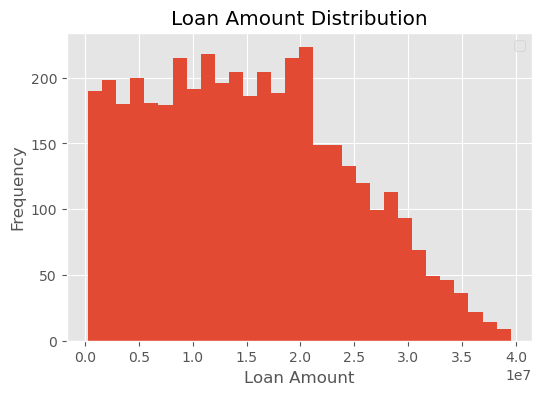

In [6]:
num_features = ['income_annum', 'loan_amount', 'cibil_score','residential_assets_value','commercial_assets_value',
                'luxury_assets_value','bank_asset_value','no_of_dependents','loan_term','loan_amount']

for col in num_features:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30) 
    plt.title(f'{col.replace("_"," ").title()} Distribution')   
    plt.xlabel(col.replace("_"," ").title())
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

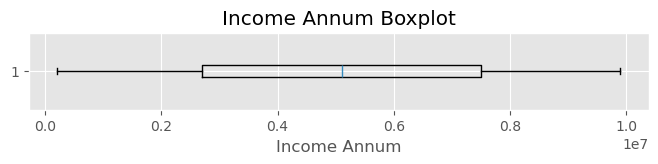

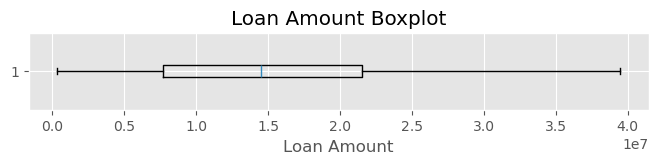

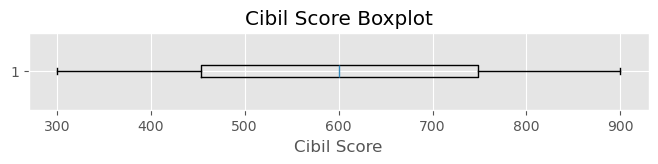

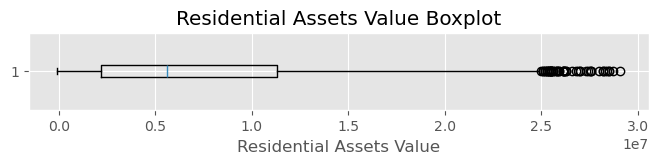

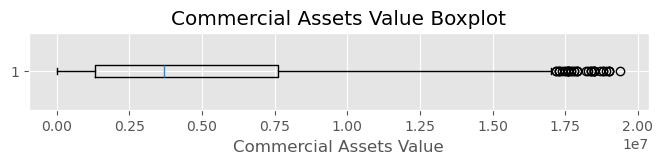

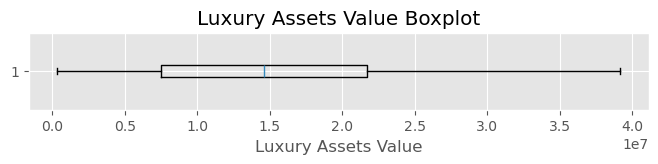

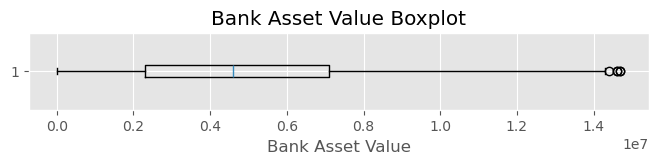

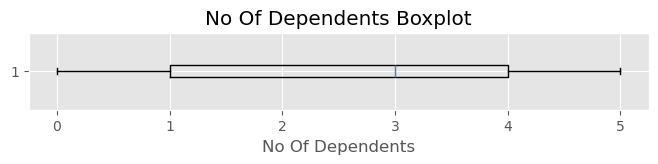

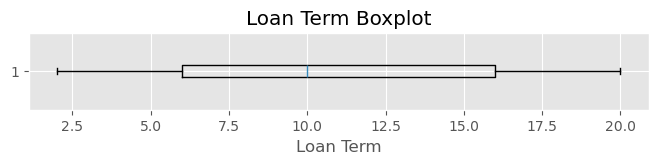

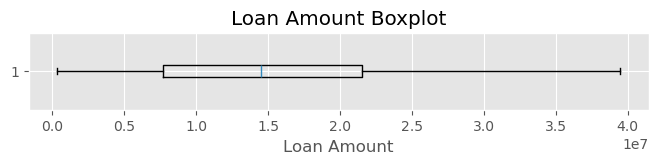

In [7]:
# To check outlier
#print(df[num_features].describe())
for col in num_features:
    plt.figure(figsize=(8,1))
    plt.boxplot(df[col], vert=False)
    plt.title(f'{col.replace("_"," ").title()} Boxplot')
    plt.xlabel(col.replace("_"," ").title())
    plt.show()

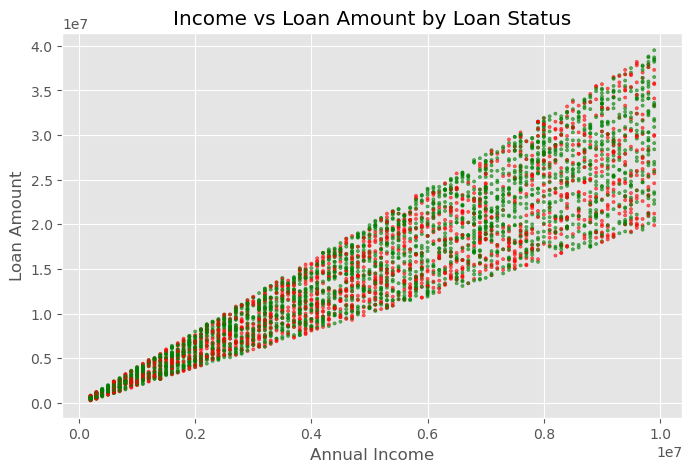

In [8]:
colors = df['loan_status'].map({'Approved':'green', 'Rejected':'red'})

plt.figure(figsize=(8,5))
plt.scatter(df['income_annum'], df['loan_amount'],s=5,c=colors, alpha=0.6)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Income vs Loan Amount by Loan Status')
plt.show()

In [9]:
df['total_assets'] = (
    df['residential_assets_value'] +
    df['commercial_assets_value'] +
    df['luxury_assets_value'] +
    df['bank_asset_value']
)

df['loan_to_income_ratio'] = df['loan_amount'] / df['income_annum']
df['assets_to_loan_ratio'] = df['total_assets'] / df['loan_amount']

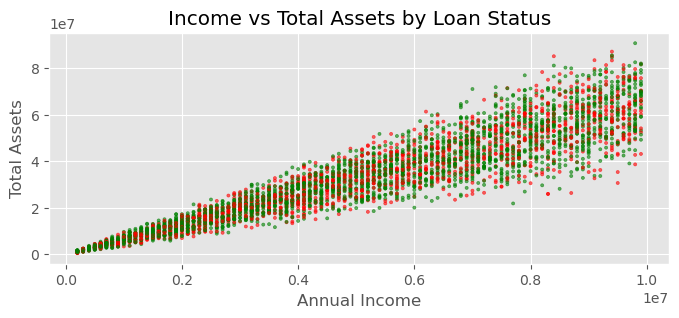

In [10]:
plt.figure(figsize=(8,3))
plt.scatter(df['income_annum'], df['total_assets'],s=5,c=colors, alpha=0.6)
plt.xlabel('Annual Income')
plt.ylabel('Total Assets')
plt.title('Income vs Total Assets by Loan Status')
plt.show()

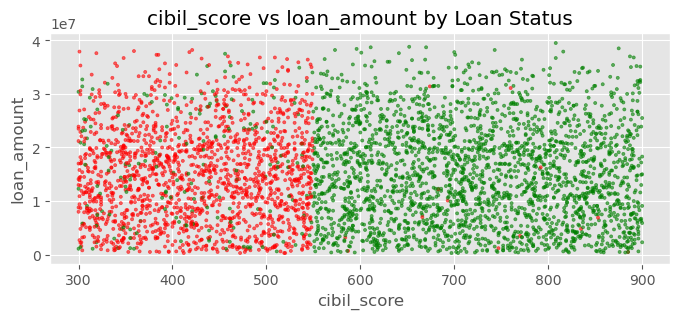

In [11]:
plt.figure(figsize=(8,3))
plt.scatter(df['cibil_score'], df['loan_amount'],s=5,c=colors, alpha=0.6)
plt.xlabel('cibil_score')
plt.ylabel('loan_amount')
plt.title('cibil_score vs loan_amount by Loan Status')
plt.show()

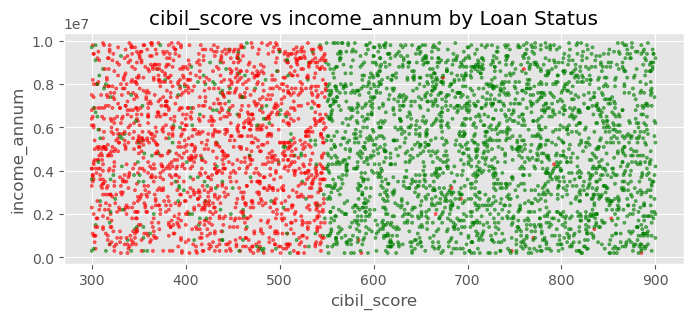

In [12]:
plt.figure(figsize=(8,3))
plt.scatter(df['cibil_score'], df['income_annum'],s=5,c=colors, alpha=0.6)
plt.xlabel('cibil_score')
plt.ylabel('income_annum')
plt.title('cibil_score vs income_annum by Loan Status')
plt.show()

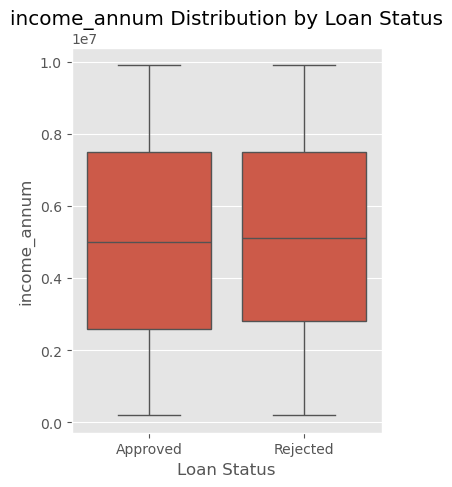

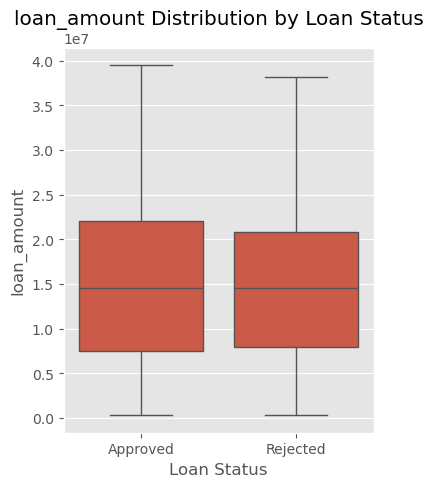

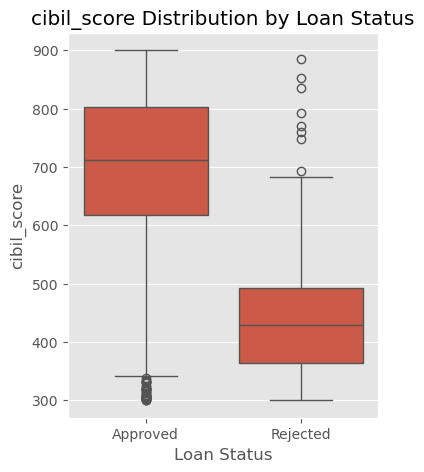

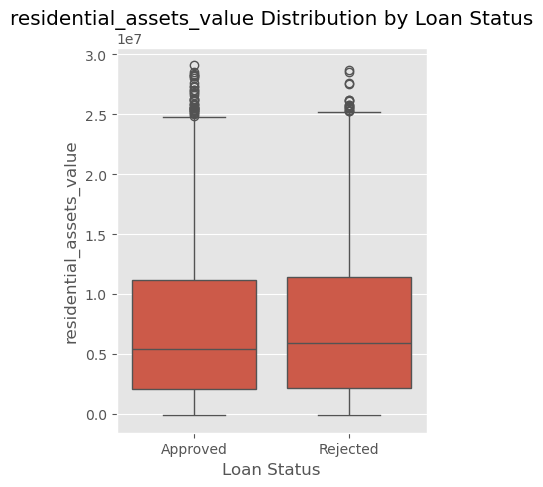

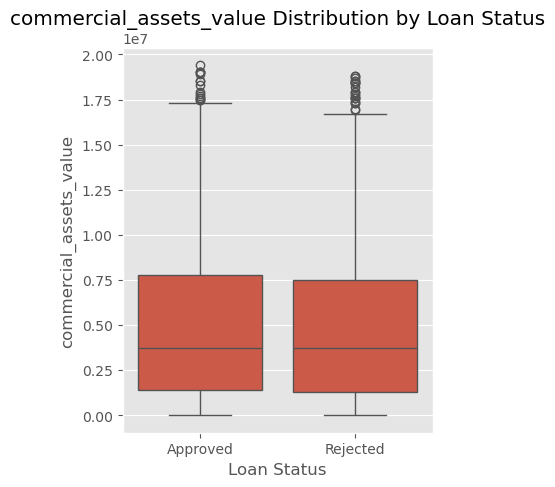

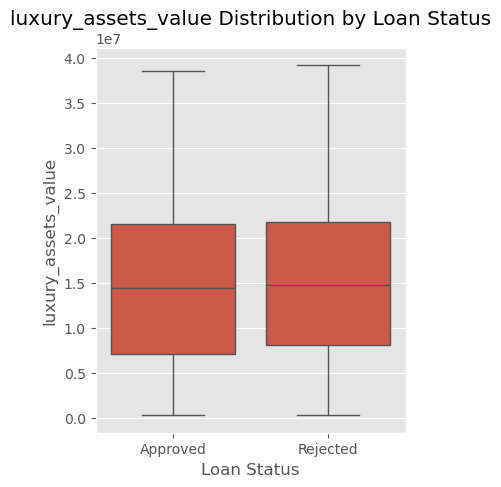

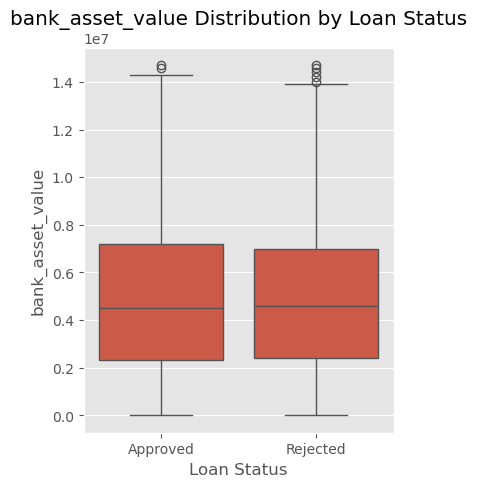

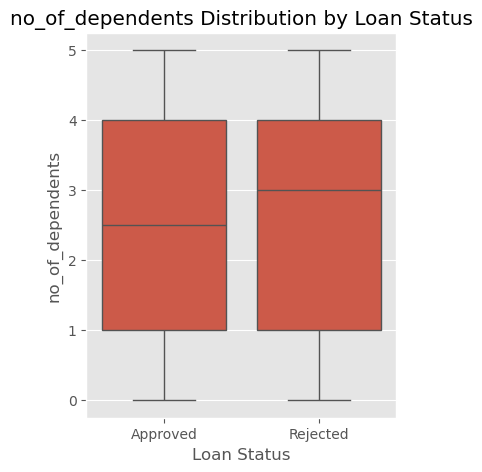

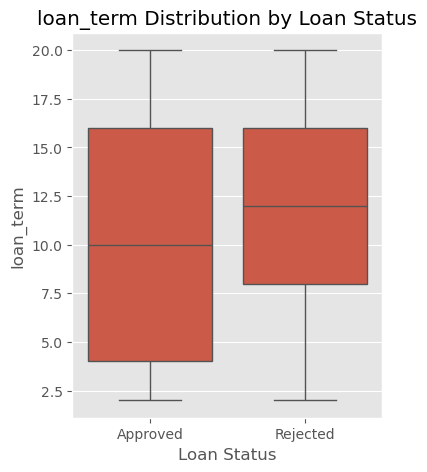

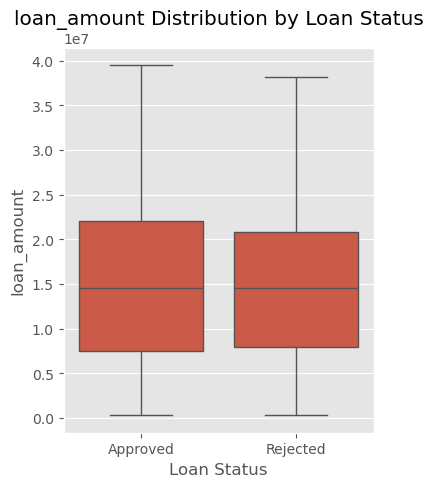

In [13]:
#Bivariate Analysis (Feature vs Loan Status)
for col in num_features:
    plt.figure(figsize=(4,5))
    sns.boxplot(x='loan_status',y=col,data=df)
    
    plt.title(f"{col} Distribution by Loan Status")
    plt.xlabel('Loan Status')
    plt.ylabel(f"{col}")
    plt.show()


In [14]:
# sns.pairplot(df,vars=num_features,hue='loan_status')
# plt.show()

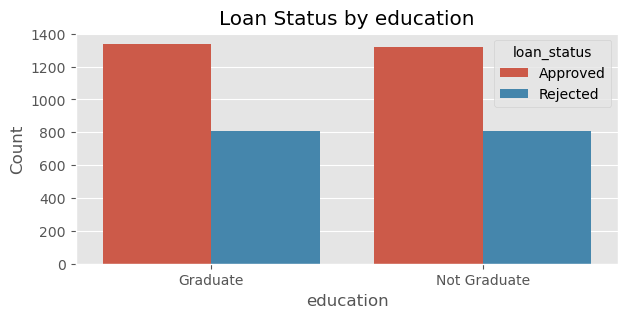

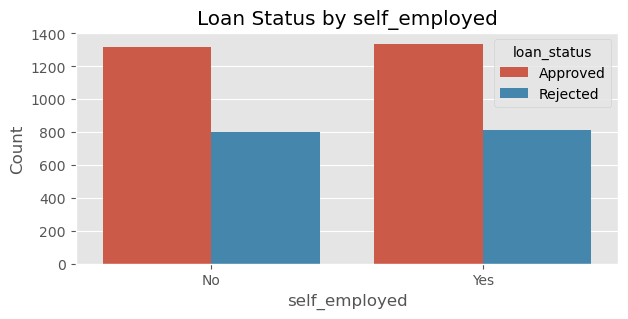

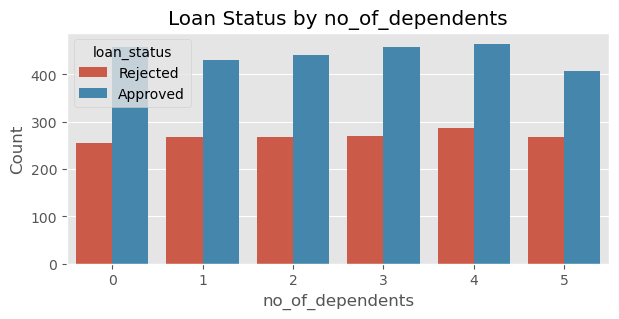

In [15]:
cat_features = ['education', 'self_employed', 'no_of_dependents']
for col in cat_features:
    plt.figure(figsize=(7,3))
    sns.countplot(data=df,x=col,hue='loan_status')
    plt.title('Loan Status by '+col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [16]:
# feature engineering


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,loan_to_income_ratio,assets_to_loan_ratio
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000,3.114583,1.695652
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000,2.975610,1.393443
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000,3.263736,1.942761
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000,3.743902,1.716612
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000,2.469388,2.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,7400000,2.300000,3.217391
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,20000000,3.424242,1.769912
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,39000000,3.676923,1.631799
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,28800000,3.121951,2.250000
